# Instacart Market Basket analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/haoranli/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Merging and cleaning data

The raw dataset can be found in https://www.kaggle.com/competitions/instacart-market-basket-analysis

In [4]:
ROOT = "./data/"

# Loading data
orders = pd.read_csv(ROOT + "orders.csv")
products = pd.read_csv(ROOT + "products.csv")
aisles = pd.read_csv(ROOT + "aisles.csv")
departments = pd.read_csv(ROOT + "departments.csv")
order_products_prior = pd.read_csv(ROOT + "order_products__prior.csv")

In [5]:
# Merging data
products = pd.merge(aisles, products, on="aisle_id")
products = pd.merge(departments, products, on="department_id")
products = pd.merge(order_products_prior, products, on="product_id")
products_and_orders = pd.merge(products, orders, on="order_id")
products_and_orders.head(10)

,order_id,product_id,add_to_cart_order,reordered,department_id,department,aisle_id,aisle,product_name,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,16,dairy eggs,86,eggs,Organic Egg Whites,202279,prior,3,5,9,8.0
1,2,28985,2,1,4,produce,83,fresh vegetables,Michigan Organic Kale,202279,prior,3,5,9,8.0
2,2,9327,3,0,13,pantry,104,spices seasonings,Garlic Powder,202279,prior,3,5,9,8.0
3,2,45918,4,1,13,pantry,19,oils vinegars,Coconut Butter,202279,prior,3,5,9,8.0
4,2,30035,5,0,13,pantry,17,baking ingredients,Natural Sweetener,202279,prior,3,5,9,8.0
5,2,17794,6,1,4,produce,83,fresh vegetables,Carrots,202279,prior,3,5,9,8.0
6,2,40141,7,1,13,pantry,105,doughs gelatins bake mixes,Original Unflavored Gelatine Mix,202279,prior,3,5,9,8.0
7,2,1819,8,1,13,pantry,88,spreads,All Natural No Stir Creamy Almond Butter,202279,prior,3,5,9,8.0
8,2,43668,9,0,4,produce,123,packaged vegetables fruits,Classic Blend Cole Slaw,202279,prior,3,5,9,8.0
9,26,33120,5,0,16,dairy eggs,86,eggs,Organic Egg Whites,153404,prior,2,0,16,7.0


## Exploratory Analysis

In [142]:
products_and_orders.to_csv(ROOT + "products_and_orders.csv")

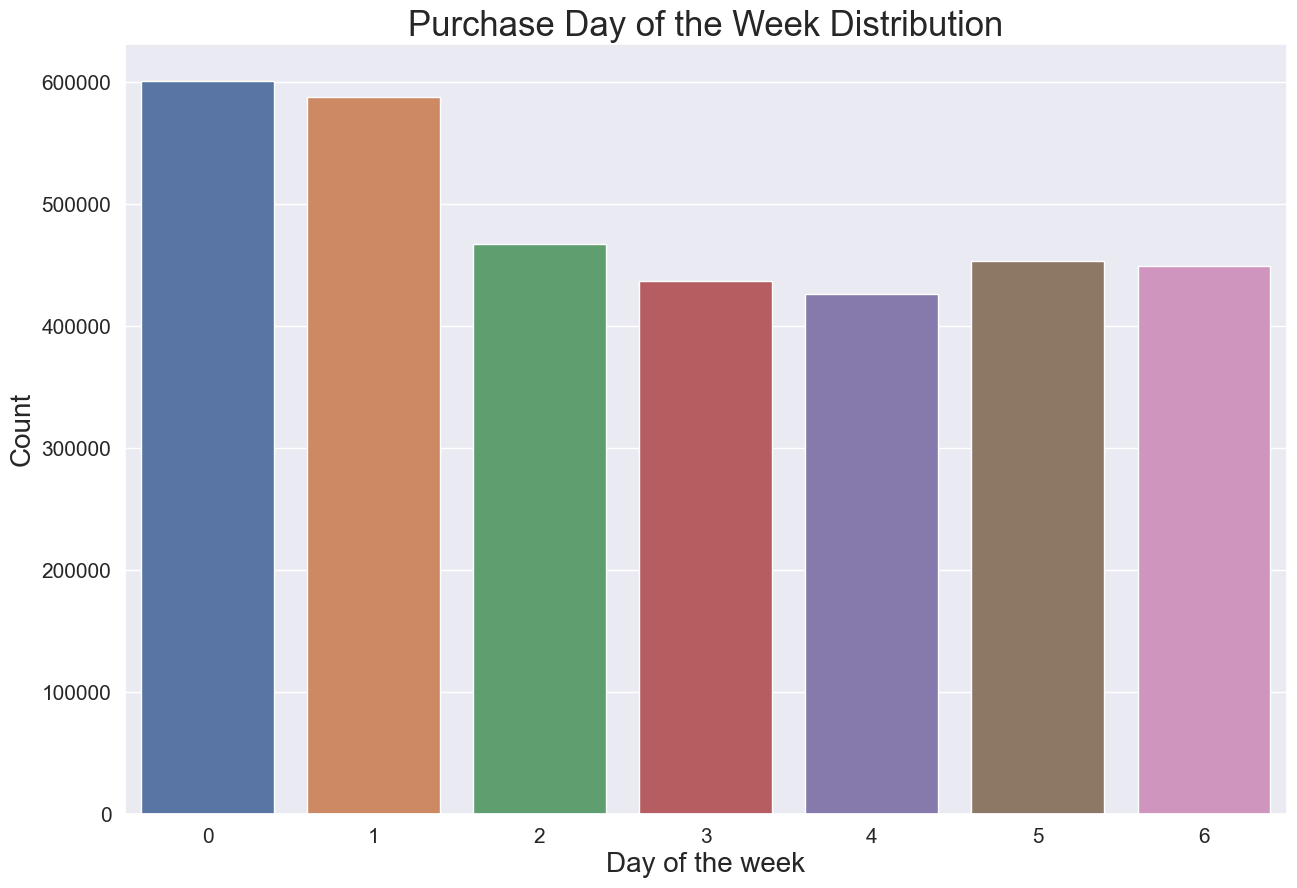

In [92]:
# count plot of order_dow distribution
plt.figure(figsize=(15,10))
sns.countplot(orders, x="order_dow")
plt.xlabel('Day of the week', fontsize=20);
plt.ylabel('Count', fontsize=20);
plt.title("Purchase Day of the Week Distribution", fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

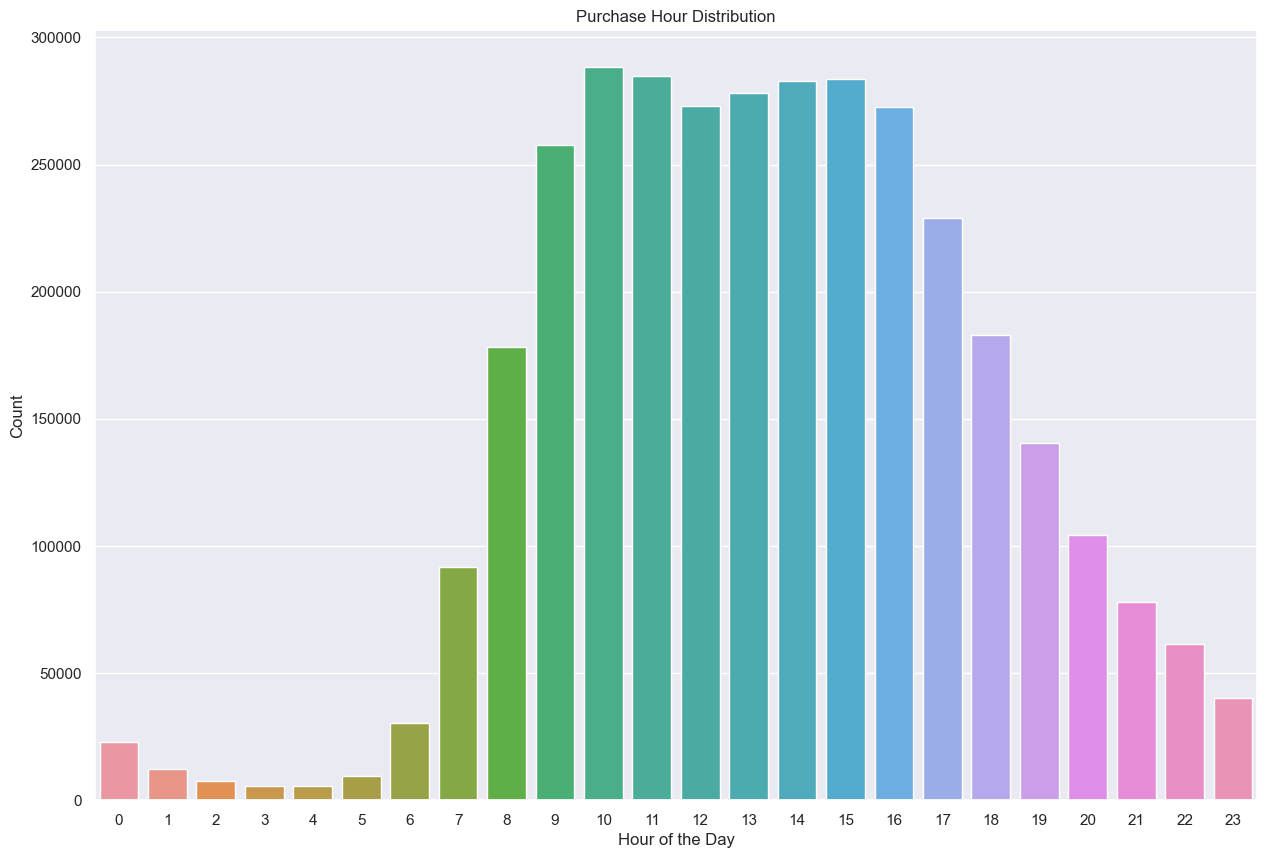

In [91]:
# count plot of order_hour_of_day distribution
plt.figure(figsize=(15,10))
sns.countplot(orders, x="order_hour_of_day")
plt.title("Purchase Hour Distribution")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.show()

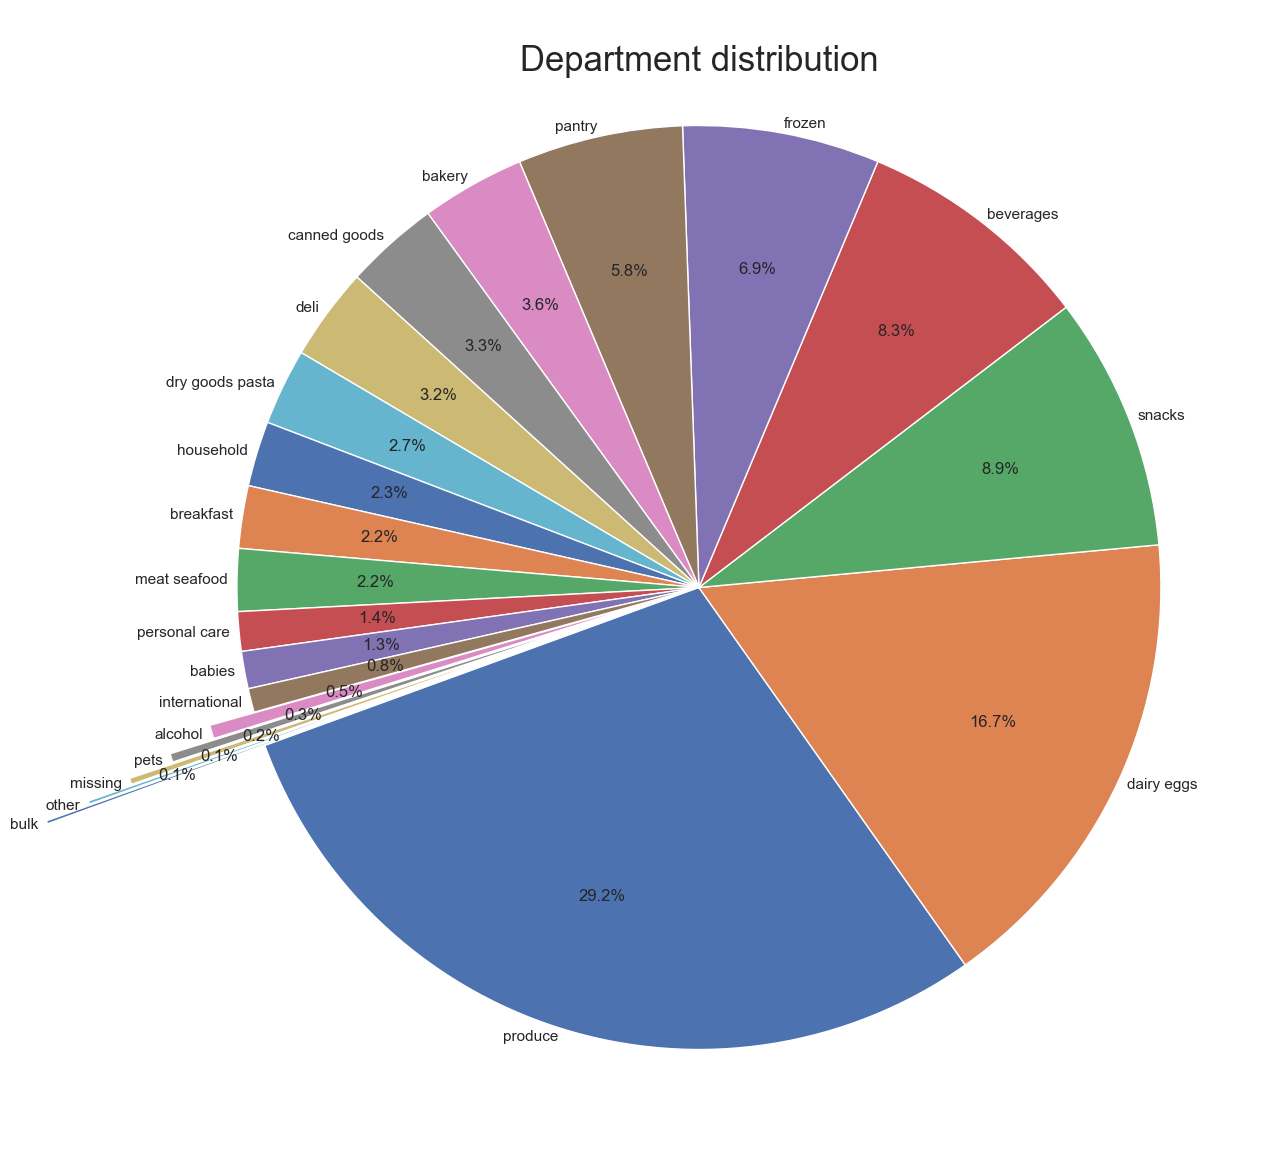

In [130]:
# pie chart of department distribution
plt.figure(figsize=(15,15))

department_counts = products_and_orders['department'].value_counts()
labels = department_counts.index
weight_sizes = np.array(department_counts) / department_counts.sum() * 100
explode = [0] * 16 + [0.1, 0.2, 0.3, 0.4, 0.5]

plt.pie(weight_sizes, labels=labels, explode=explode, autopct='%1.1f%%', startangle=200, pctdistance=0.7, labeldistance=1.02)
plt.title("Department distribution", fontsize=25, y=.94)
plt.show()

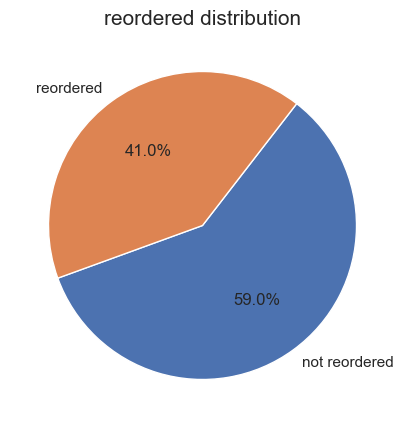

In [69]:
# pie chart of reordering distribution
plt.figure(figsize=(5,5))
reorder_counts = products_and_orders['reordered'].value_counts()
labels = ['not reordered', 'reordered']
weight_sizes = np.array(reorder_counts) / reorder_counts.sum() * 100
plt.pie(weight_sizes, labels=labels, autopct='%1.1f%%', startangle=200)
plt.title("reordered distribution", fontsize=15)
plt.show()

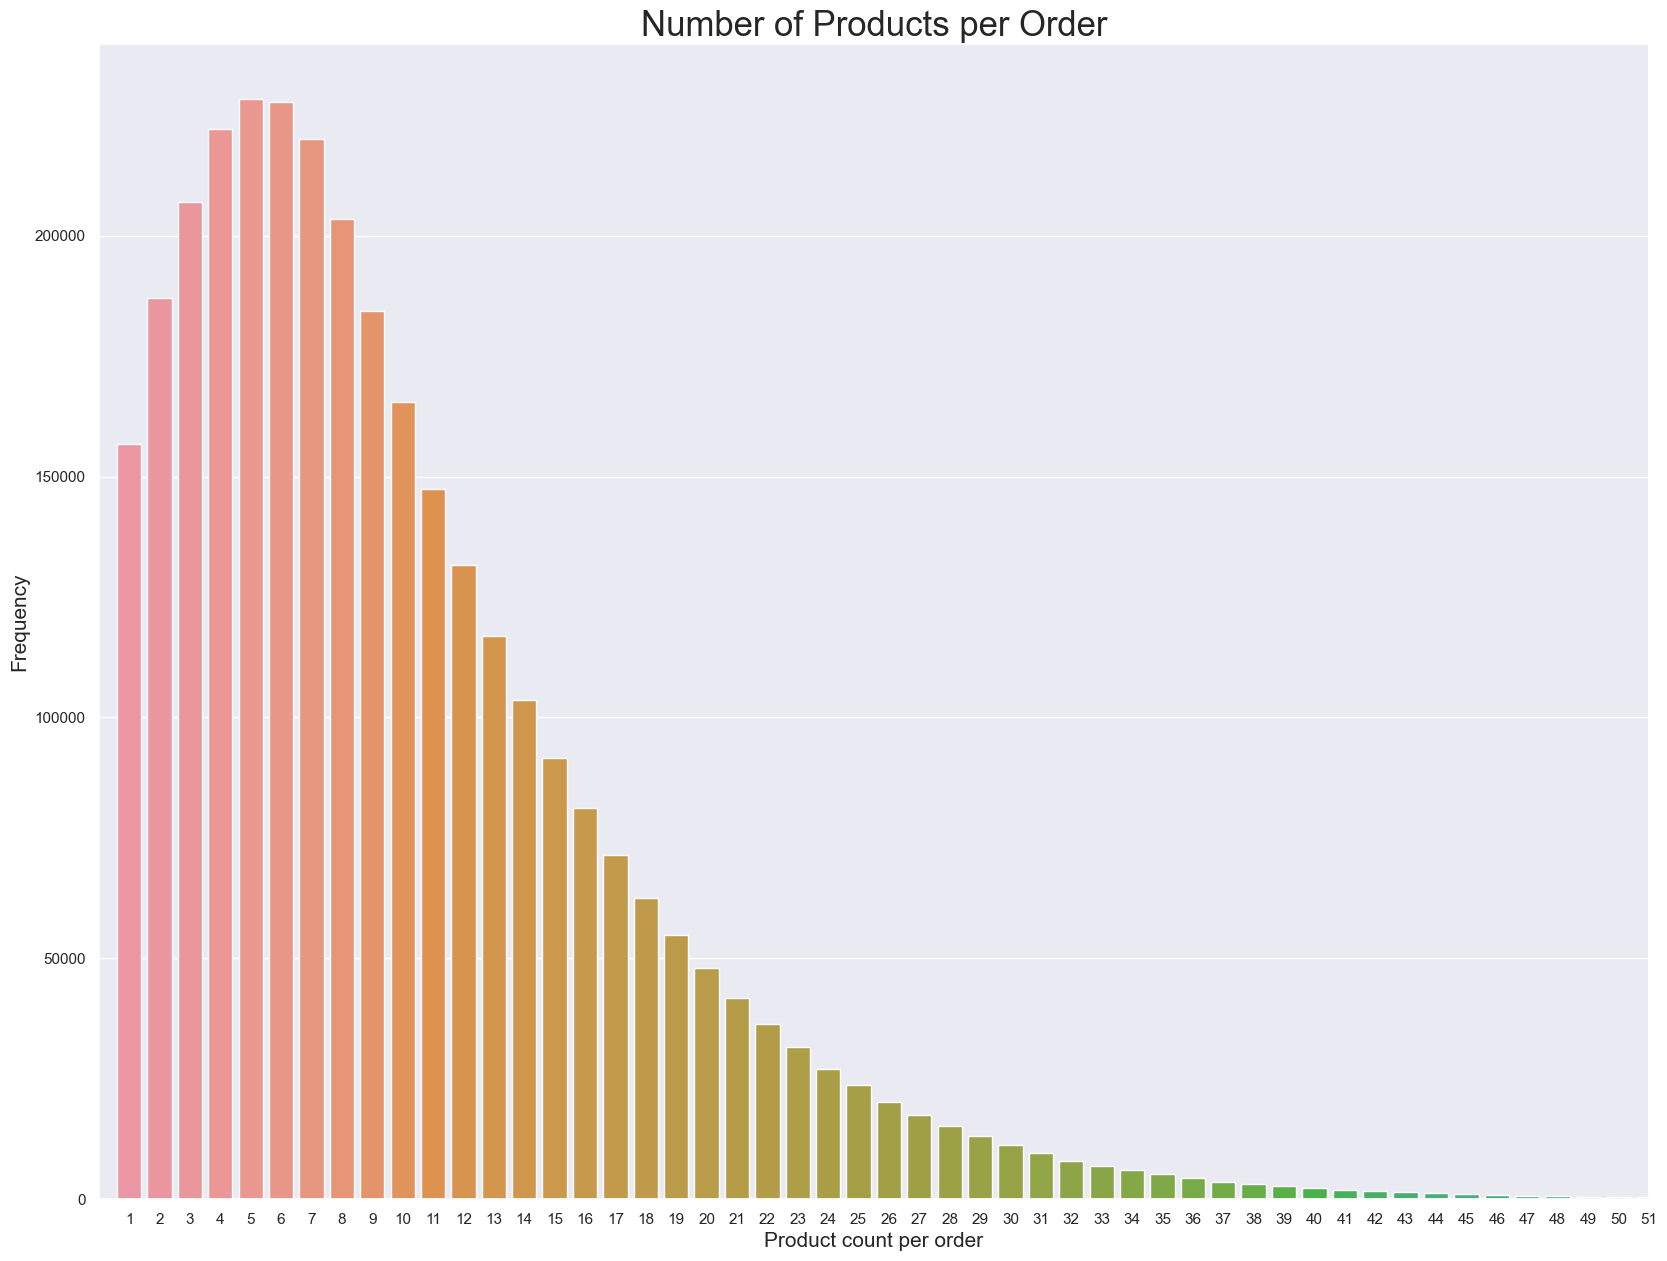

In [75]:
# count plot of product_count_per_order
product_count_per_order = products.groupby("order_id")["add_to_cart_order"].max().reset_index()
plt.figure(figsize=(20,15))
sns.countplot(product_count_per_order, x="add_to_cart_order")
plt.xlabel("Product count per order", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xlim([-1, 50])
plt.title("Number of Products per Order", fontsize=25)
plt.show()

In [76]:
# top 10 most purchased products
top_ten_products = products["product_name"].value_counts().head(10)
top_ten_products

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

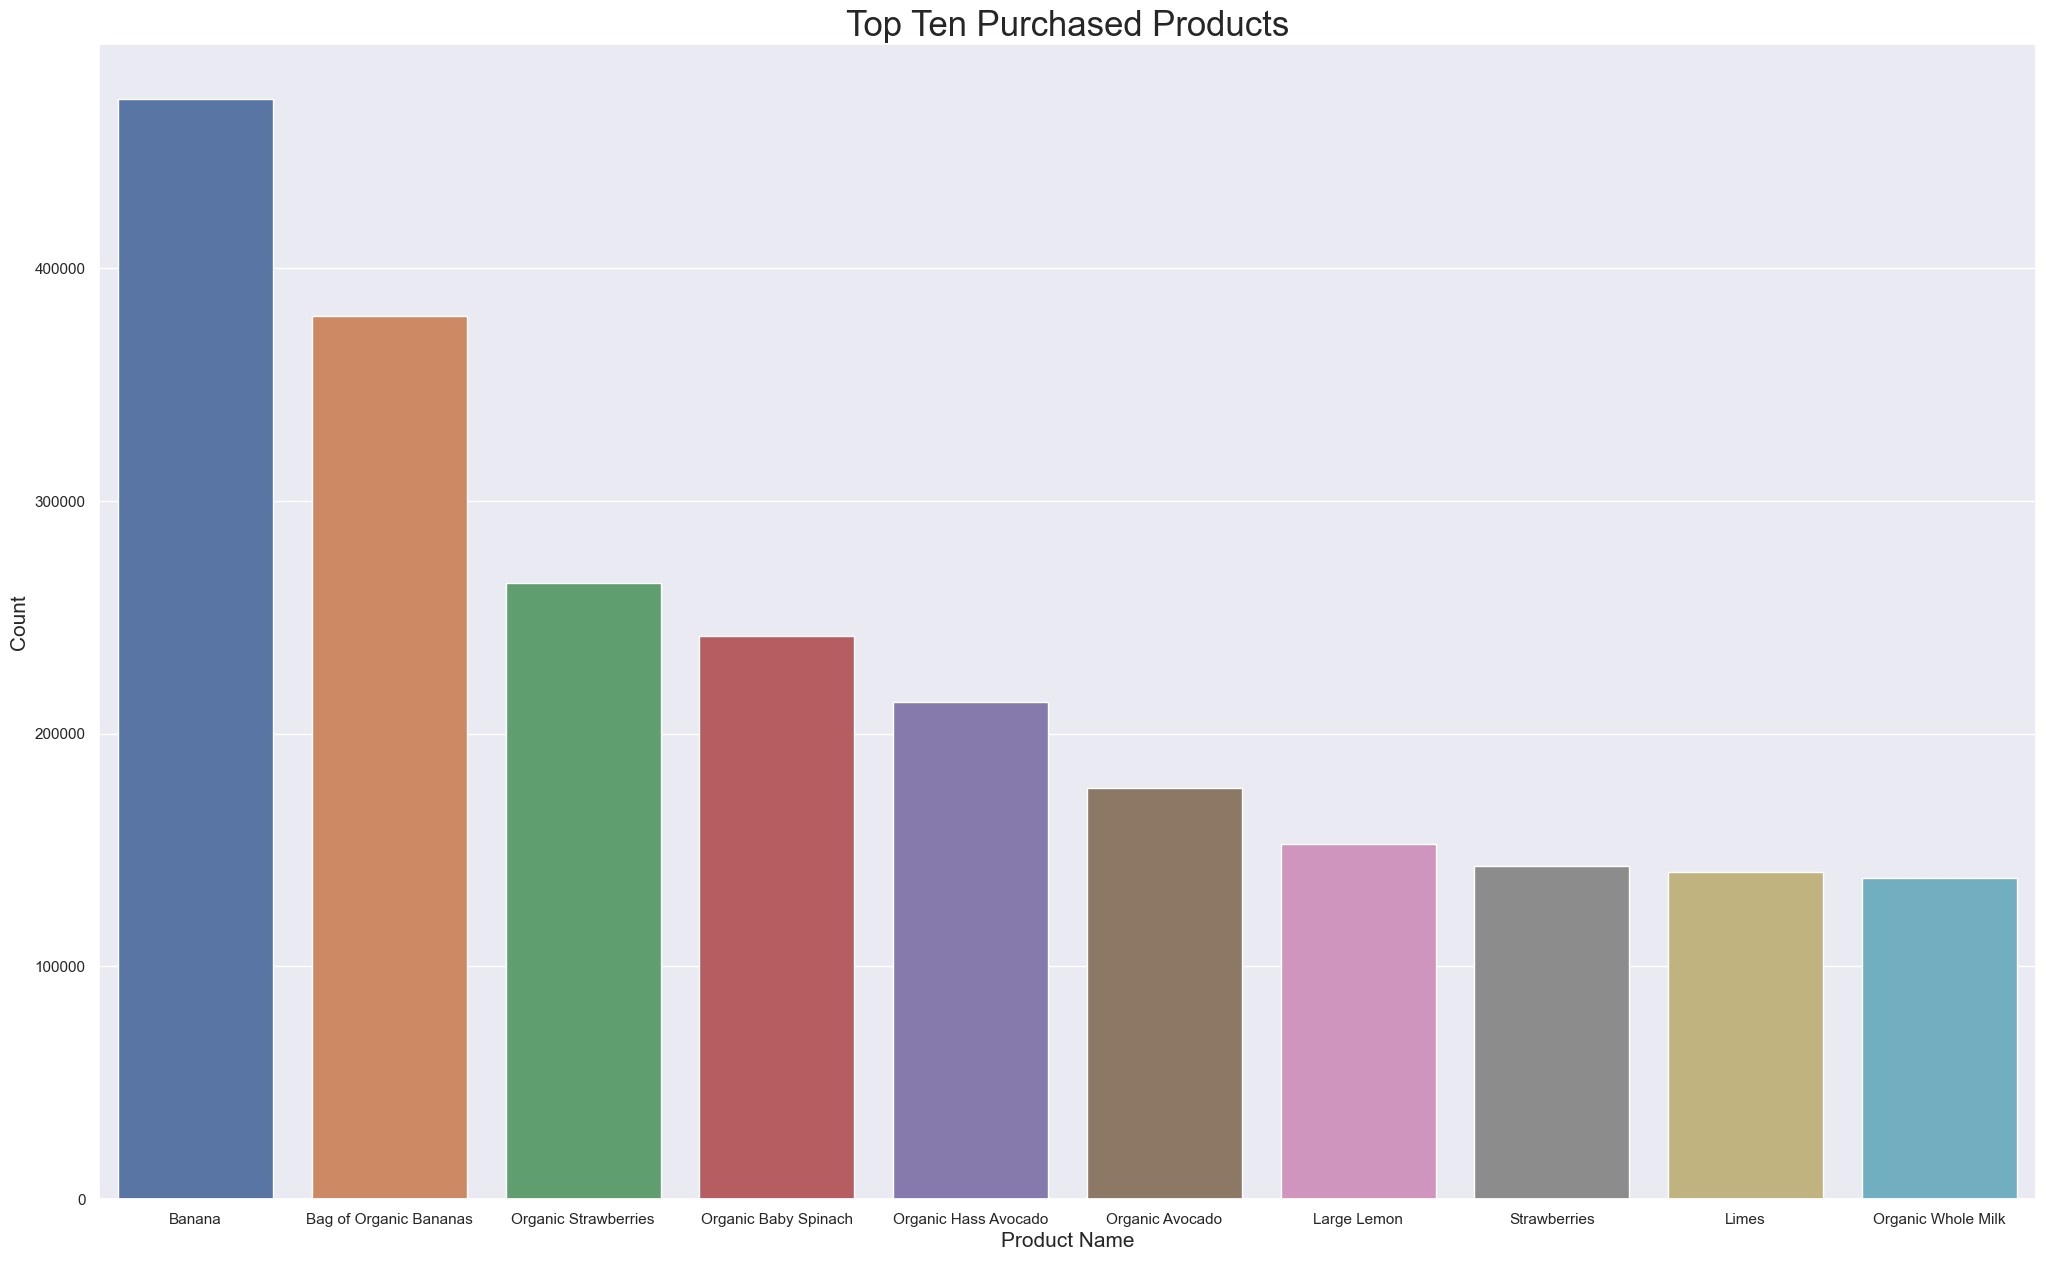

In [83]:
plt.figure(figsize=(25,15))
sns.countplot(x="product_name", data=products, order=products.product_name.value_counts().iloc[:10].index)
plt.title("Top Ten Purchased Products", fontsize=25)
plt.xlabel("Product Name", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [79]:
# least purchased products (purchased exactly once)
bottom_products = products["product_name"].value_counts().tail(132)
bottom_products

Serrated Steak Knives          2
Petite Black Eyed Peas         1
Master Blend Ground Coffee     1
Brut Prosecco                  1
Escapes Variety Pack           1
                              ..
Frittata, Farmer's Market      1
Fig Balsamic Vinegar           1
Punjabi Chhole, Hot Spicy      1
Molasses, Bead                 1
Flatbread Pizza All Natural    1
Name: product_name, Length: 132, dtype: int64

In [95]:
# top 10 most reordered products, note these are in accordance with the top 10 most purchased products
product_reorders = products.groupby(['product_id', 'product_name'])['reordered'].count().reset_index()
product_reorders = product_reorders.rename(columns={"reordered": "reorder_count"})
top_ten_reordered_products = product_reorders.nlargest(10, "reorder_count").reset_index(drop=True)
top_ten_reordered_products

,product_id,product_name,reorder_count
0,24852,Banana,472565
1,13176,Bag of Organic Bananas,379450
2,21137,Organic Strawberries,264683
3,21903,Organic Baby Spinach,241921
4,47209,Organic Hass Avocado,213584
5,47766,Organic Avocado,176815
6,47626,Large Lemon,152657
7,16797,Strawberries,142951
8,26209,Limes,140627
9,27845,Organic Whole Milk,137905


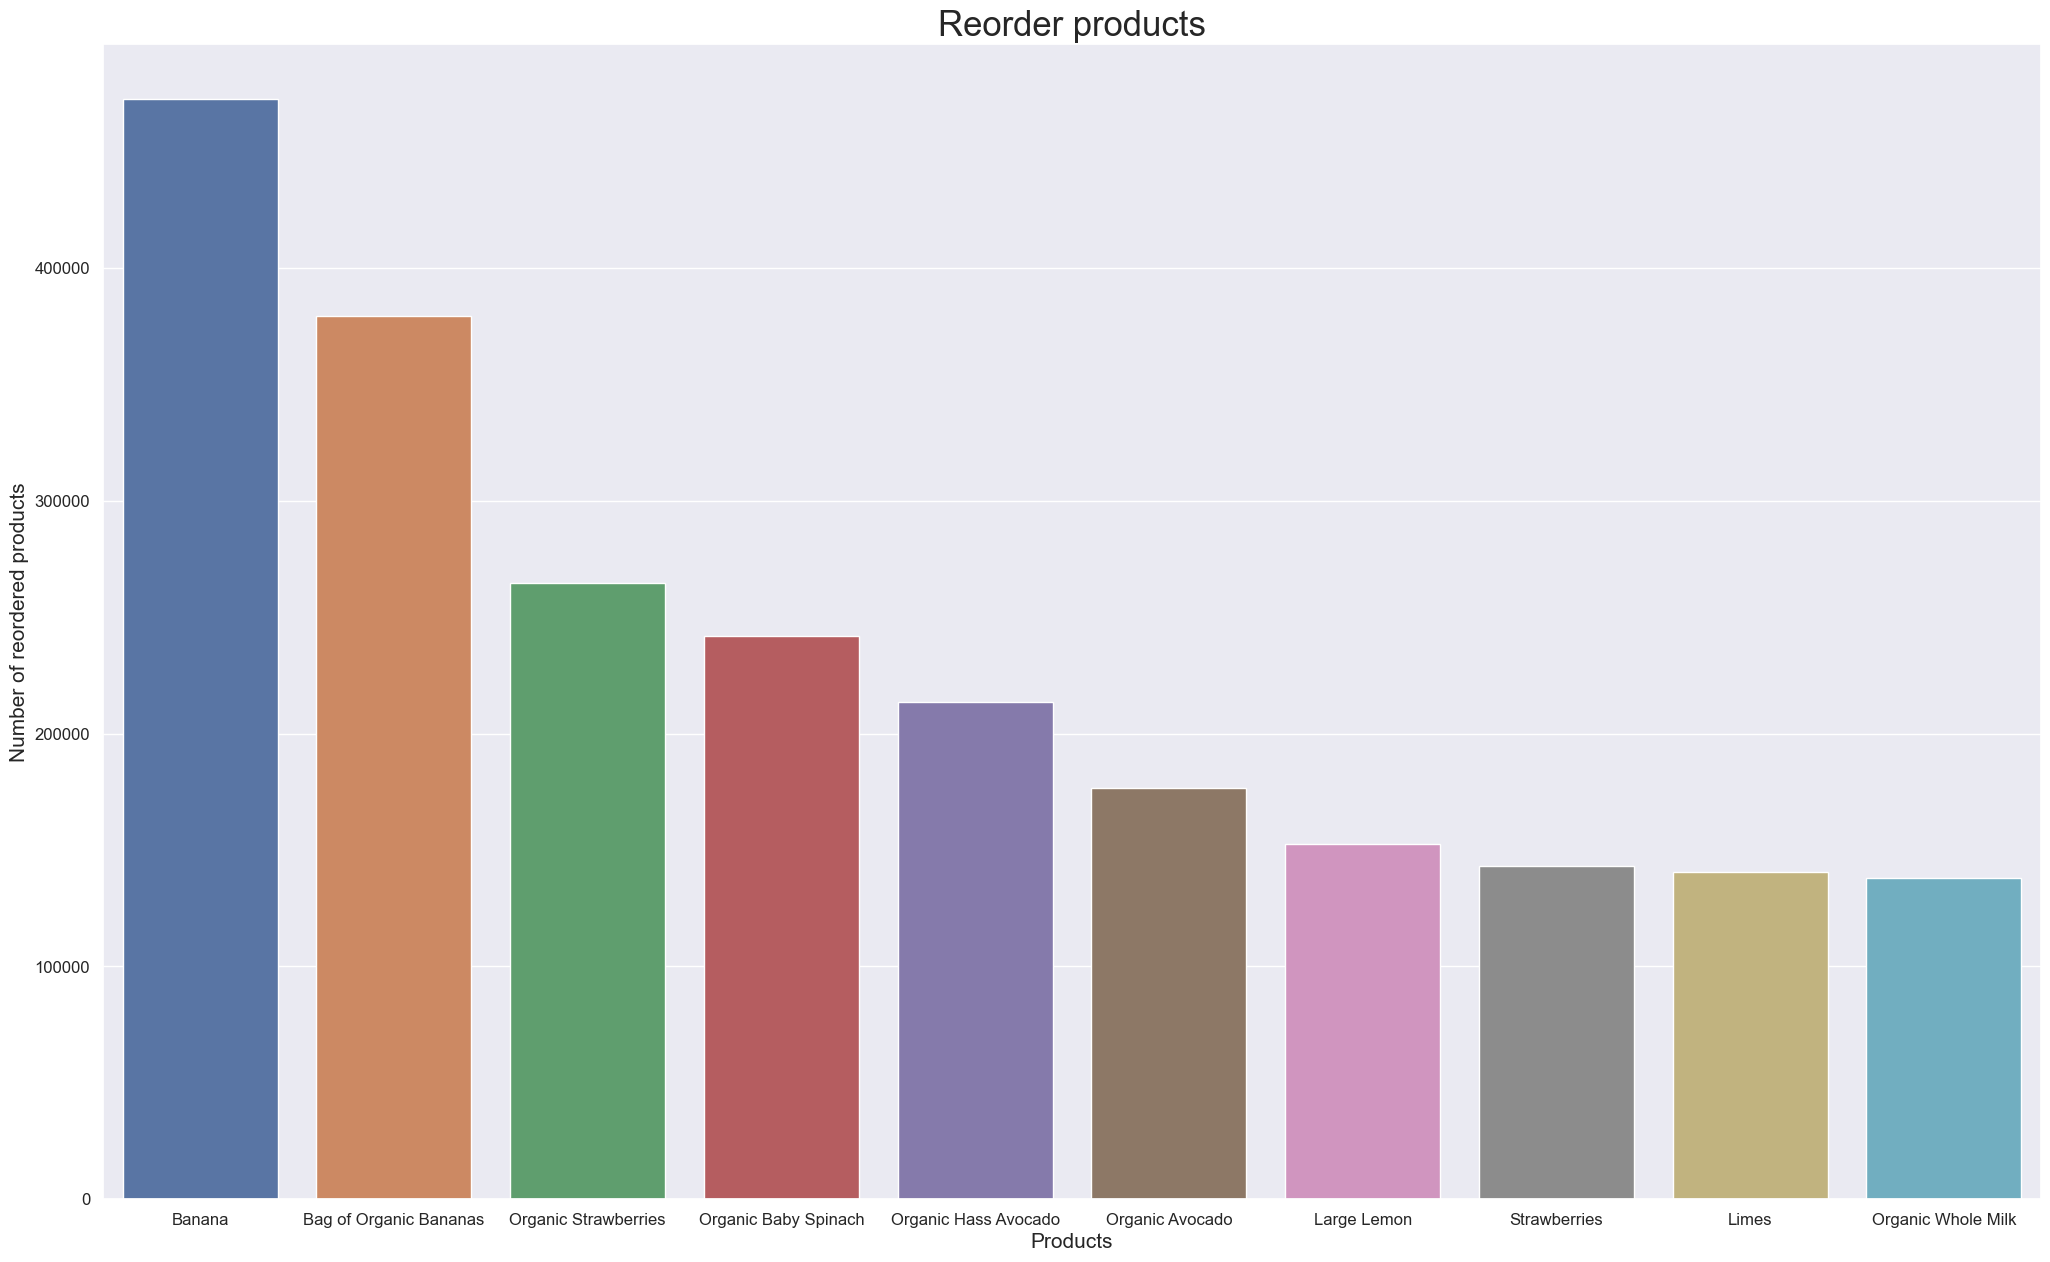

In [88]:
plt.figure(figsize=(25,15))
sns.barplot(x="product_name", y="reorder_count", data=top_ten_reordered_products)
plt.xlabel('Products', fontsize=15)
plt.ylabel('Number of reordered products', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Reorder products', fontsize=25)
plt.show()

In [99]:
# count plot of customer_order_counts
customer_order_counts = orders.groupby("user_id")["order_number"].max().reset_index()
customer_order_counts

,user_id,order_number
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
...,...,...
206204,206205,4
206205,206206,68
206206,206207,17
206207,206208,50


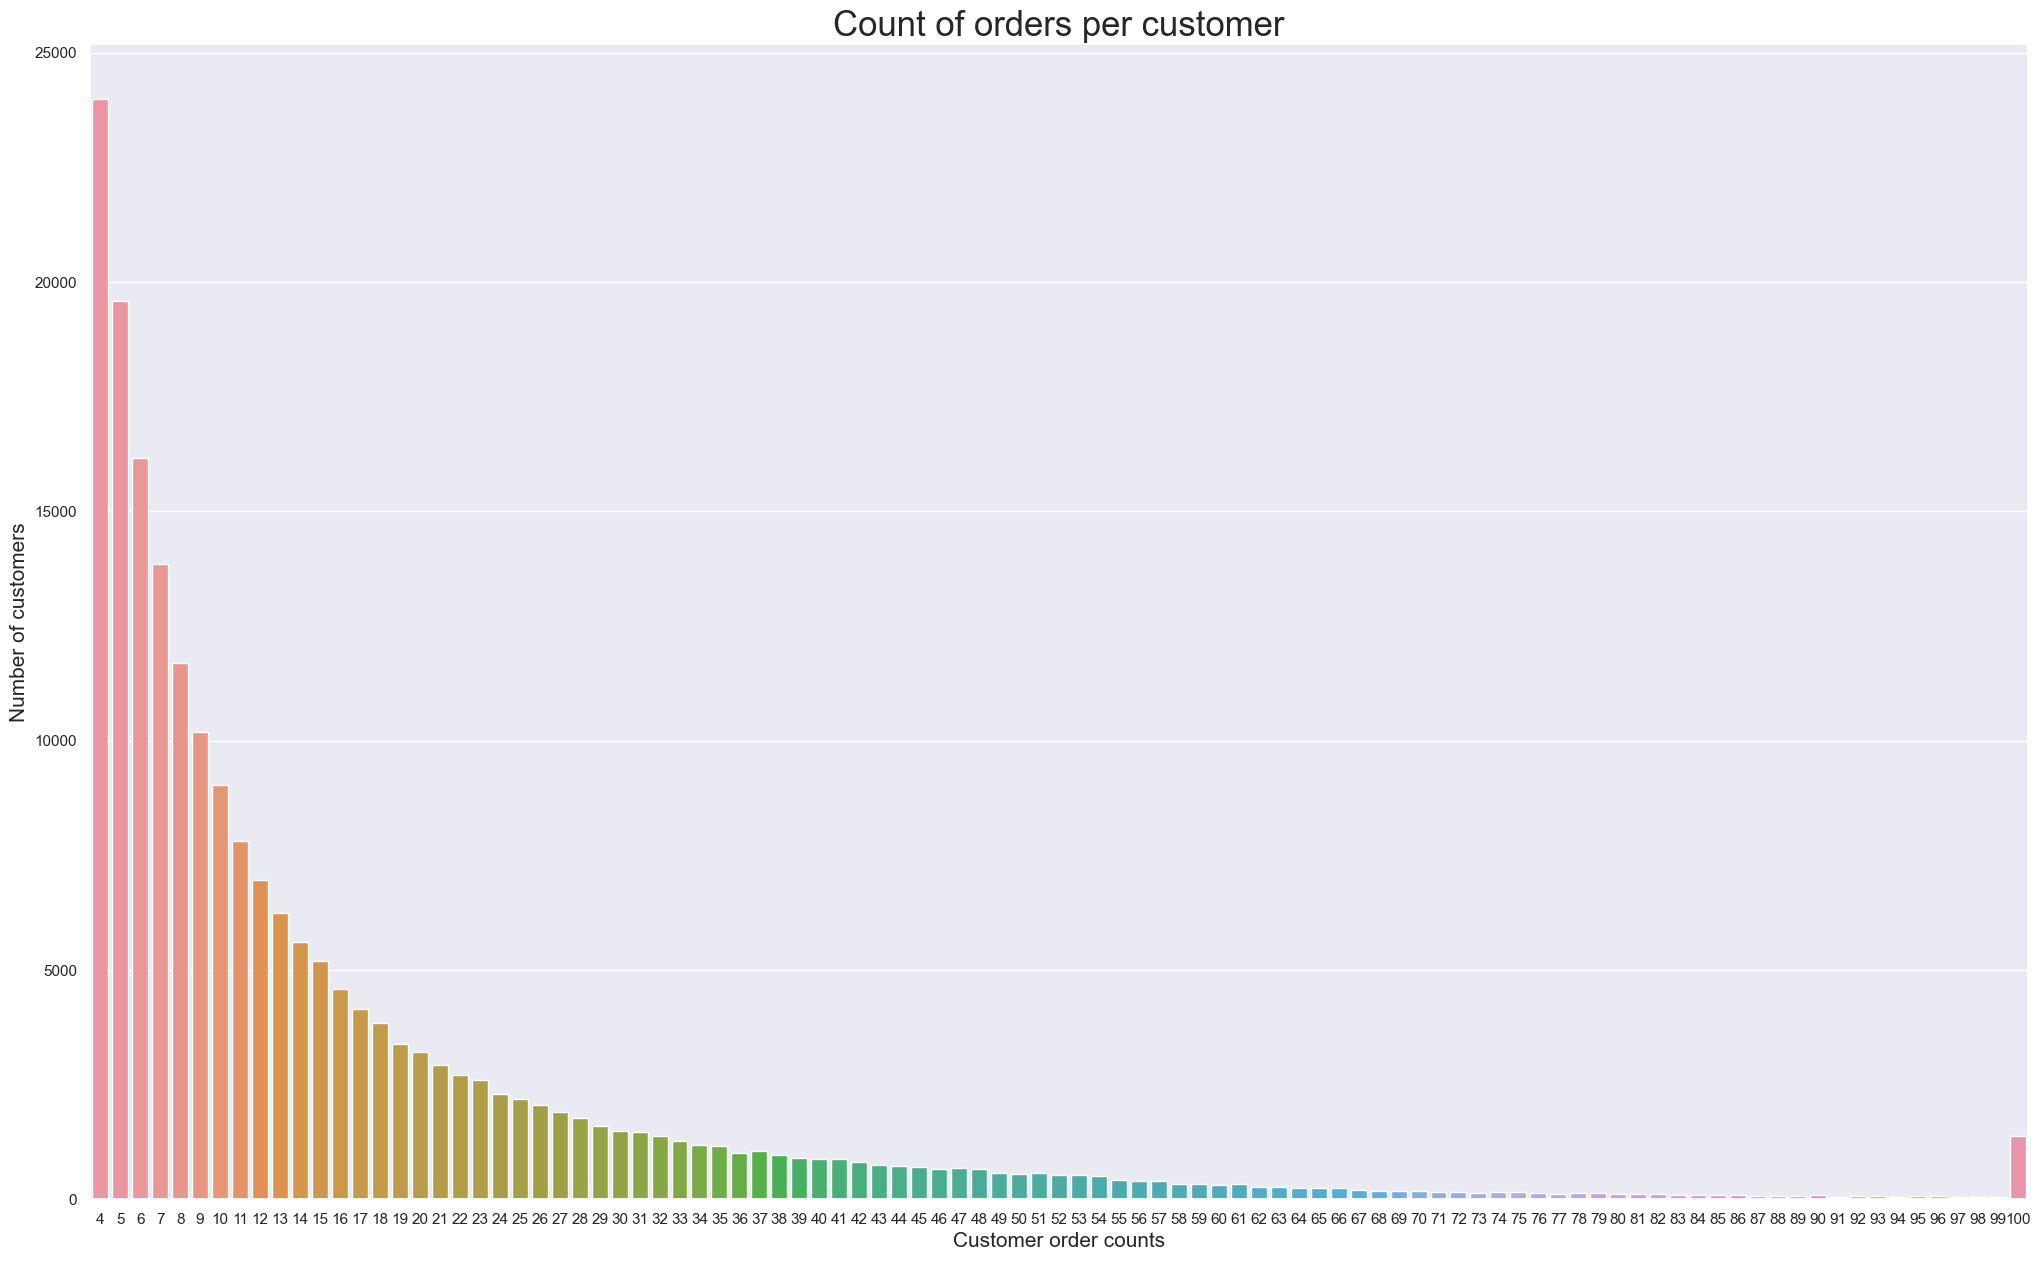

In [100]:
plt.figure(figsize=(25,15))
sns.countplot(customer_order_counts, x="order_number")
plt.title("Count of orders per customer", fontsize=25)
plt.xlabel("Customer order counts", fontsize=15)
plt.ylabel("Number of customers", fontsize=15)
plt.show()

# notice that after 100, it stopped counting

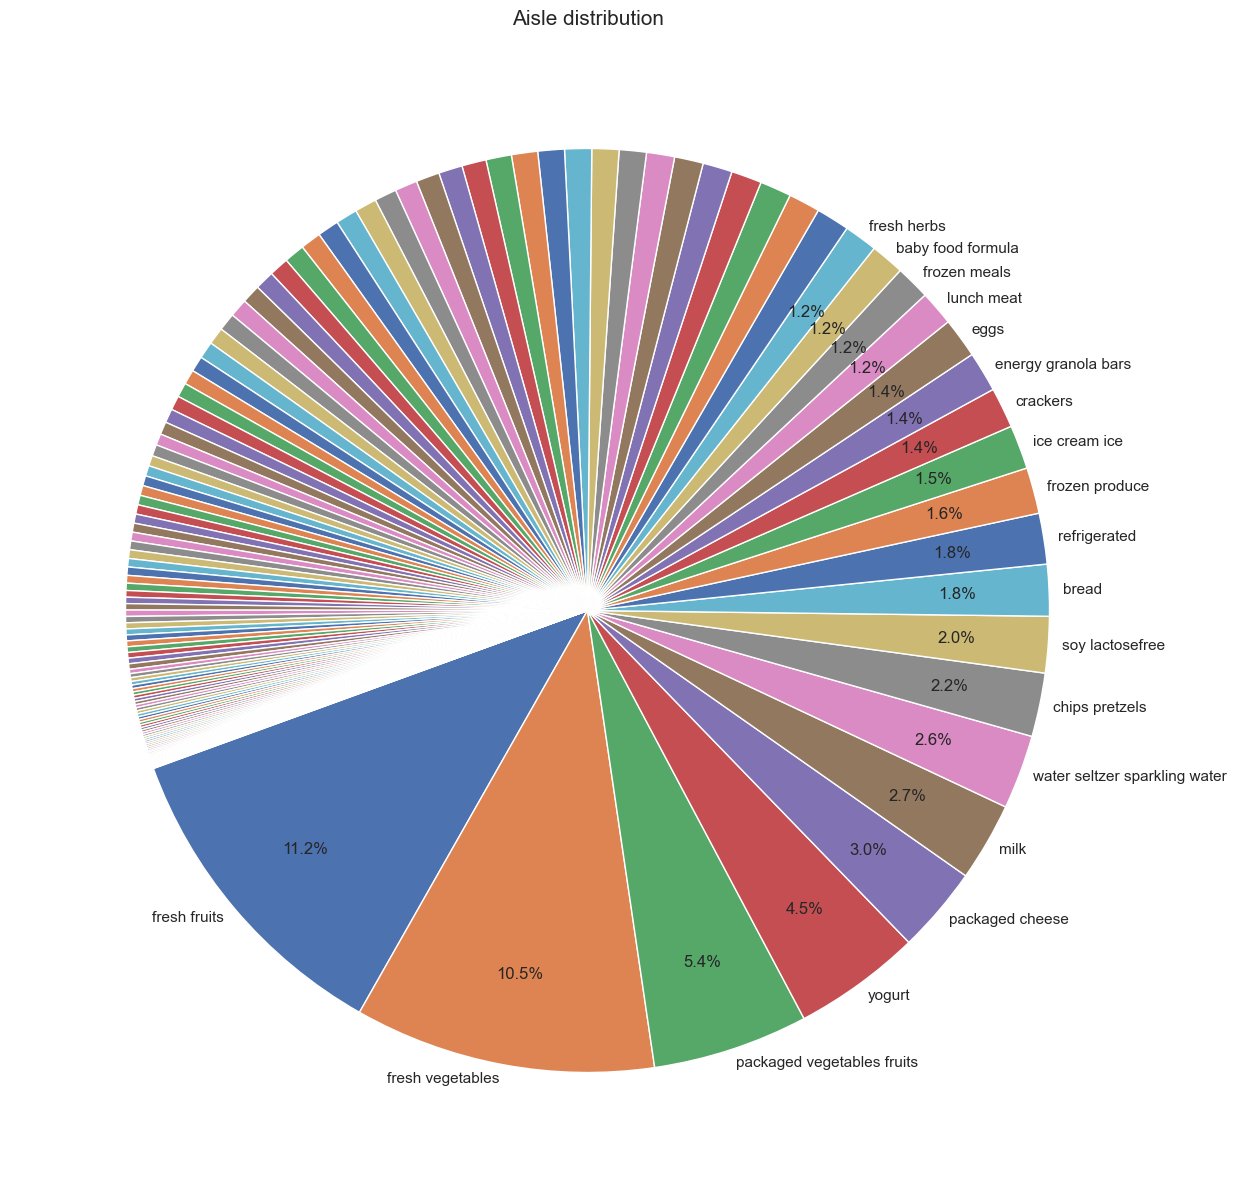

In [129]:
# pie chart for aisle distribution, only the fisrt 20 are displayed
plt.figure(figsize=(15,15))
aisle_counts = products_and_orders['aisle'].value_counts()
labels = aisle_counts.index.tolist()[:20] + [''] * (len(aisle_counts)-20)
weight_sizes = np.array(aisle_counts) / aisle_counts.sum() * 100
plt.pie(weight_sizes, labels=labels,
        autopct=lambda p: f'{p:.1f}%' if p > weight_sizes[20] else '',
        startangle=200, pctdistance=0.8, labeldistance=1.03)
plt.title("Aisle distribution", fontsize=15)
plt.show()

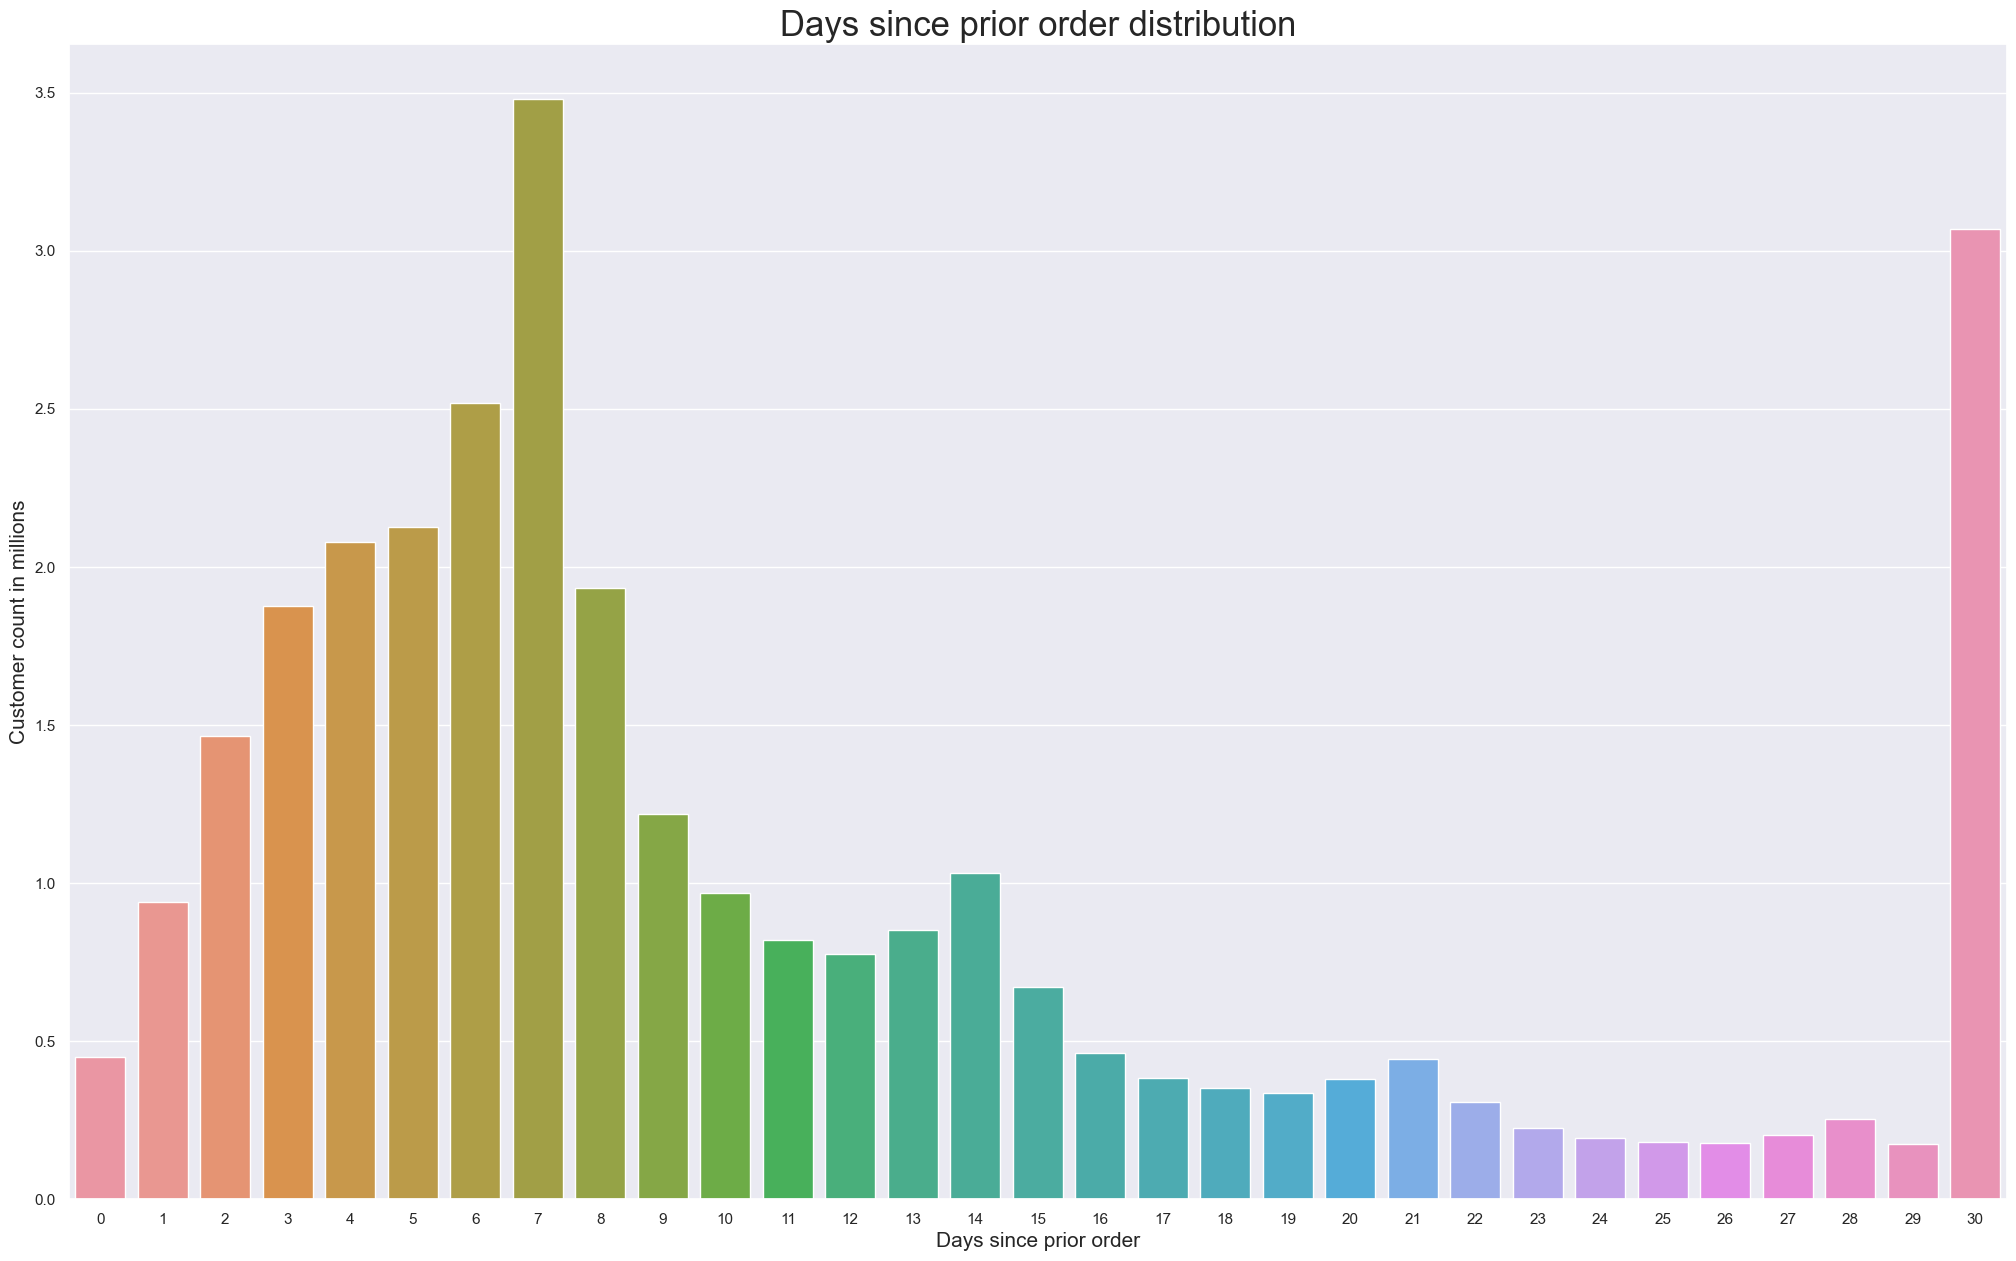

In [141]:
# count plot of dsp_count
dsp_count = products_and_orders['days_since_prior_order'].value_counts()
plt.figure(figsize=(25,15))
plt.xlabel("Days since prior order", fontsize=15)
plt.ylabel("Customer count in millions", fontsize=15)
sns.barplot(x=list(map(int,dsp_count.index)), y=dsp_count.values/1000000)
plt.title("Days since prior order distribution", fontsize=25)
plt.show()